# 数据分析咖哥十话

## 第7话 千呼万唤求爆款：内容分析发现价值

**题解** 这一话的思路把目光从运营回归到产品和内容：数据分析中，对于产品（也包括内容和服务）的分析是一个基本课题，而提高用户留存率的核心就是持续输出更好的内容和更优秀的产品。

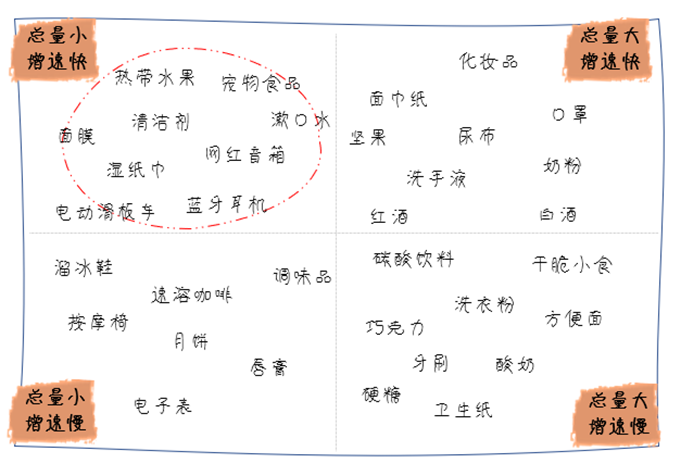

<center>产品的总量与增速矩阵</center>

**详细内容请参考拙作：《数据分析咖哥十话》** 人民邮电出版社2022年出版

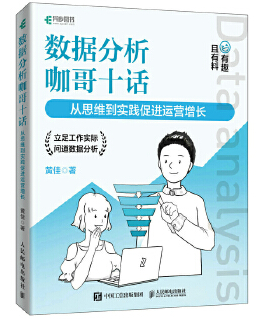

购书链接：https://item.jd.com/13335199.html

In [1]:
import pandas as pd # 导入Pandas
import numpy as np # 导入NumPy
import matplotlib.pyplot as plt # 导入pyplot 模块
import seaborn as sns # 导入Seaborn
plt.rcParams["font.family"]=['SimHei'] #用来设定字体样式
plt.rcParams['font.sans-serif']=['SimHei'] #用来设定无衬线字体样式
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

**本章文件较大，请读者在我的Github下载分类视频.csv，并放入Notebook同一目录。**

https://github.com/huangjia2019/datalogic

In [2]:
df_video = pd.read_csv("分类视频.csv") # 载入数据集
df_video # 输出前几行数据

,视频ID,热榜日期,标题,频道,分类码,上传时间,访问量,点赞数,吐槽数,评论数,是否关闭评论,是否关闭评级,说明文字,分类,标签
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,博客,SHANtell martin
1,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,Today we find out if Link is a Nickelback amat...,娱乐,"rhett and link|""gmm""|""good mythical morning""|""..."
2,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,I know it's been a while since we did this sho...,娱乐,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
3,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,119180,9763,511,1434,False,False,Using the iPhone for the past two weeks -- her...,科技,"ijustine|""week with iPhone X""|""iphone x""|""appl..."
4,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,2103417,15993,2445,1970,False,False,Embattled Alabama Senate candidate Roy Moore (...,娱乐,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40919,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,1685609,38160,1385,2657,False,False,The Cat Who Caught the Laser - Aaron's Animals,宠物,"aarons animals|""aarons""|""animals""|""cat""|""cats""..."
40920,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,1064798,60008,382,3936,False,False,NaN,博客,[none]
40921,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,1066451,48068,1032,3992,False,False,I had so much fun transforming Safiyas hair in...,娱乐,I gave safiya nygaard a perfect hair makeover ...
40922,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,5660813,192957,2846,13088,False,False,How Black Panther Should Have EndedWatch More ...,动画,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|..."


C:\Users\Jacky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


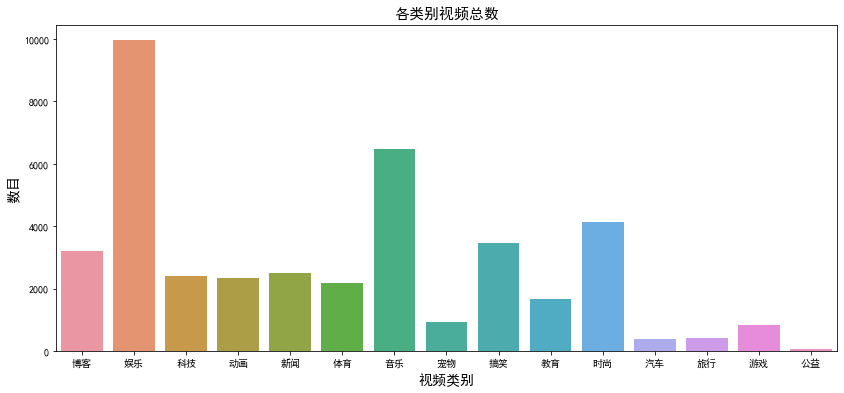

In [3]:
plt.figure(figsize = (14,6)) # # 设定画布大小
fig = sns.countplot('分类', data=df_video) # 创建柱状图
fig.set_title("各类别视频总数", fontsize=15) # 图题
fig.set_xlabel("视频类别", fontsize=14) #x 轴标题
fig.set_ylabel("数目", fontsize=14) #y 轴标题
plt.show() # 输出图像

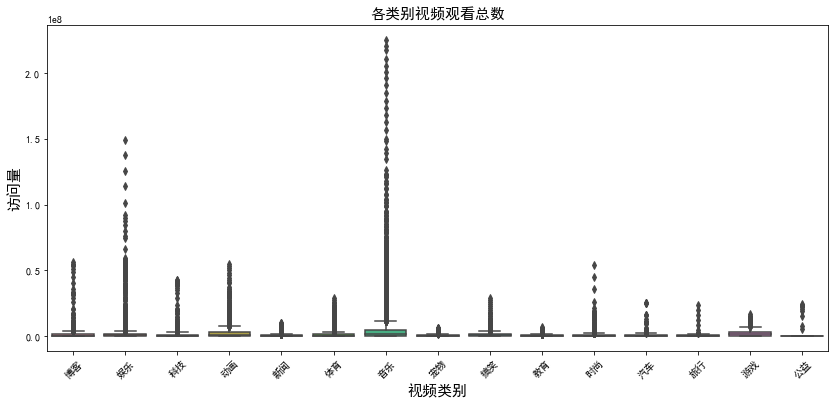

In [4]:
plt.figure(figsize = (14,6)) #设定画布大小
fig = sns.boxplot(x='分类', y='访问量', data=df_video) #创建箱线图
fig.set_xticklabels(fig.get_xticklabels(),rotation=45) #X轴标签倾斜
fig.set_title("各类别视频观看总数", fontsize=15) #图题
fig.set_xlabel("视频类别", fontsize=15) #X轴标题
fig.set_ylabel("访问量", fontsize=15) #Y轴标题
plt.show() #显示图像

In [5]:
print(df_video.sort_values(by=['访问量'],ascending=False). 标题.head(5)) # 播放量在前5 名的视频

38522    Childish Gambino - This Is America (Official V...
38320    Childish Gambino - This Is America (Official V...
38121    Childish Gambino - This Is America (Official V...
37910    Childish Gambino - This Is America (Official V...
37705    Childish Gambino - This Is America (Official V...
Name: 标题, dtype: object


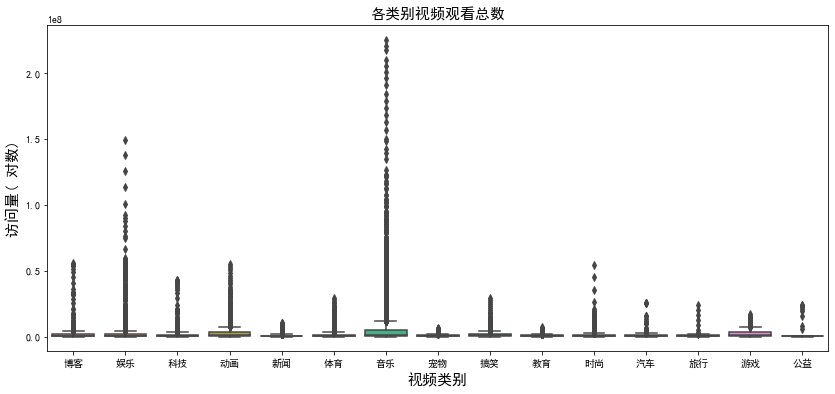

In [6]:
df_video['访问量( 对数)'] = np.log(df_video['访问量'] + 1) # 将访问量做对数转换处理
plt.figure(figsize = (14,6)) # 设定画布大小
fig = sns.boxplot(x='分类', y='访问量', data=df_video) # 创建箱线图
fig.set_title("各类别视频观看总数", fontsize=15) # 图题
fig.set_xlabel("视频类别", fontsize=15) #x 轴标题
fig.set_ylabel("访问量( 对数)", fontsize=15) #y 轴标题
plt.show() # 输出图像

In [7]:
# 转换格式
df_video['热榜日期'] = pd.to_datetime(df_video['热榜日期'],errors='coerce', format='%y.%d.%m')
df_video['上传时间'] = pd.to_datetime(df_video['上传时间'], 
                                  errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
# 删除非零值
df_video = df_video[df_video['热榜日期'].notnull()]
df_video = df_video[df_video['上传时间'].notnull()]
df_video.insert(4, '上传日期', df_video['上传时间'].dt.date) # 上传日期
df_video[' 上传时间'] = df_video['上传时间'].dt.time # 上传时间
df_video_full = df_video.reset_index().sort_values('热榜日期').set_index('视频ID') # 排序
df_video = df_video.reset_index().sort_values('热榜日期'). \
    drop_duplicates('视频ID',keep='last').set_index('视频ID') # 删除重复值
df_video[['上传日期','上传时间']].head() # 输出前几行数据

,上传日期,上传时间
视频ID,,
5x1FAiIq_pQ,2017-11-09,2017-11-09 15:49:21
vd4zwINEcLY,2011-03-27,2011-03-27 04:31:25
7fm7mll2qvg,2017-11-10,2017-11-10 00:00:00
q-WipZ9p0wk,2017-11-09,2017-11-09 14:00:08
zy0b9e40tK8,2017-11-09,2017-11-09 09:00:07


In [8]:
publish_to_trend = {} # 从上传到登榜天数的集合
df_video_first = df_video_full.reset_index(). \
        drop_duplicates('视频ID',keep ='first').set_index('视频ID') # 登榜日期B
diff_first = (df_video_first['热榜日期']). \
        astype('datetime64[ns]')-df_video_first['上传日期'].astype('datetime64[ns]') #B-A
diff_first = diff_first.reset_index() # 重置索引
diff_first.columns = ['视频ID','从上传到登榜天数'] # 设置字段名
# 求从上传到登榜天数的集合
for i, row in diff_first.iterrows():
    publish_to_trend[row['视频ID']] = row['从上传到登榜天数'].days
df_video_last = df_video # 最后在榜日期
diff_last = df_video['热榜日期'].astype('datetime64[ns]')-df_video['上传日期'].astype('datetime64[ns]') #C-A
diff_last = diff_last.reset_index() # 重置索引
diff_last.columns = ['视频ID','从上传到下榜天数'] # 设置字段名
df_video = df_video.reset_index() # 重置索引
df_video.insert(4,'从上传到下榜天数', diff_last['从上传到下榜天数']. \
                astype('timedelta64[D]').astype(int)) #“从上传到下榜天数”字段
df_video.insert(4,'从上传到登榜天数', 
                df_video['视频ID'].map(publish_to_trend)) # 用map() API 添加“从上传到登榜天数”字段
df_video.insert(4, '在榜天数', 0) # 在榜天数字段
df_video['在榜天数'] = (df_video['从上传到下榜天数']-df_video['从上传到登榜天数'])+1 # 求在榜天数
df_video.set_index('视频ID')[['从上传到登榜天数','在榜天数']]. \
        sort_values('在榜天数',ascending=False).head() #排序

C:\Users\Jacky\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1545: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  value = try_timedelta(v)


,从上传到登榜天数,在榜天数
视频ID,,
f4FuOi9rvKw,5,32
jYuQzAxBVZU,5,32
oJ2faqXlU1s,4,32
M4ZoCHID9GI,2,31
i5qOzqD9Rms,1,31


Text(0.5, 1.0, '视频热度持续天数统计')

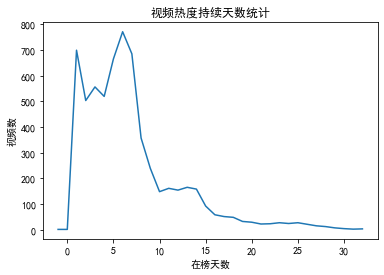

In [9]:
df_duration = df_video.groupby(['在榜天数']).count()['视频ID'] # 构建df_duration 对象
plt.plot(df_duration.index, df_duration) # 绘图
plt.xlabel('在榜天数') #x 轴
plt.ylabel('视频数') #y 轴
plt.title('视频热度持续天数统计') # 图题

Text(0.5, 1.0, '3 种类型视频热度持续天数比较')

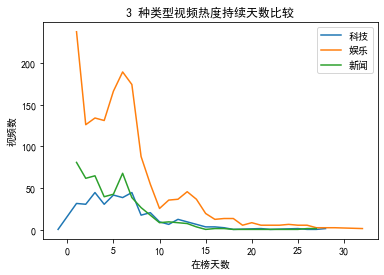

In [10]:
df_duration_tech = df_video.loc[df_video['分类']=='科技'].groupby(['在榜天数']).count()['视频ID'] #构建df_duration_tech 对象
df_duration_pop = df_video.loc[df_video['分类']=='娱乐'].groupby(['在榜天数']).count()['视频ID'] #构建df_duration_pop 对象
df_duration_news = df_video.loc[df_video['分类']=='新闻'].groupby(['在榜天数']).count()['视频ID'] #构建df_duration_news 对象
plt.plot(df_duration_tech.index, df_duration_tech, label='科技') # 绘图
plt.plot(df_duration_pop.index, df_duration_pop, label='娱乐') # 绘图
plt.plot(df_duration_news.index, df_duration_news, label='新闻') # 绘图
plt.legend(['科技','娱乐','新闻']) # 图例
plt.xlabel('在榜天数') #x 轴
plt.ylabel('视频数') #y 轴
plt.title('3 种类型视频热度持续天数比较') # 图题

Text(0.5, 1.0, '类别与在榜天数')

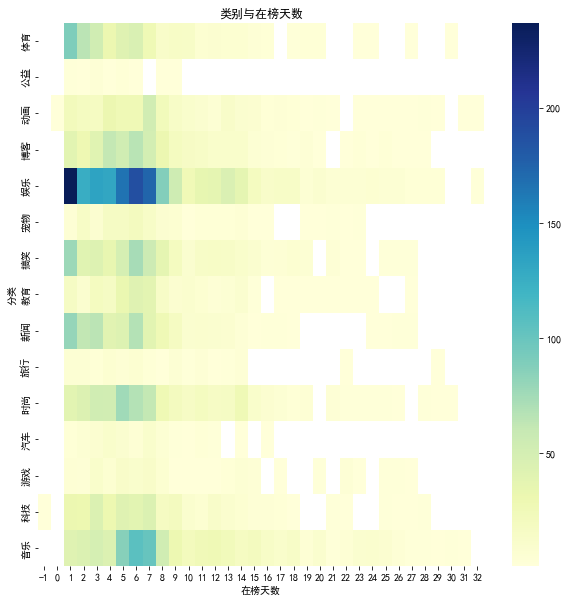

In [11]:
cat_trend_duration = df_video.groupby(['分类','在榜天数']).count()['视频ID'].unstack().clip(upper=300) # 对类别和在榜天数进行分组统计
plt.figure(figsize=(10,10)) # 设置图像大小
sns.heatmap(cat_trend_duration, cmap="YlGnBu") # 绘制相关性热力图
plt.title("类别与在榜天数") # 图题

In [18]:
import nltk # 导入NLTK 工具包
from nltk.sentiment import SentimentIntensityAnalyzer # 导入情感分析工具
from nltk.corpus import stopwords # 导入停顿词工具
from nltk import sent_tokenize, word_tokenize # 导入分词工具
import re # 导入正则表达式来匹配操作工具包
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jacky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jacky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jacky\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jacky\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
MAX_N = 1000 # 词典大小
en_stopwords = list(stopwords.words('english')) # 停顿词列表
polarities = list() # 初始化受欢迎程度
category_list = df_video['分类'].unique() # 得到所有视频分类
for cate in category_list: # 遍历视频分类
    tags_word = df_video[df_video['分类']==cate]['标签'].str.lower().str.cat(sep=' ') # 评论文字
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word) # 去除标点符号
    word_tokens = word_tokenize(tags_word) # 分词
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords] # 去除停顿词
    without_single_chr = [word for word in filtered_sentence if len(word) > 2] # 去除单字符词
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()] # 去除数字
    # Calculate frequency distribution
    # 词频统计
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N), columns=['Word', 'Frequency'])
    # 分析情绪属性
    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']
    # 确定该分类的受欢迎程度
    polarities.append(compound)
category_list = pd.DataFrame(category_list) # 转换成DataFrame 格式
polarities = pd.DataFrame(polarities) # 转换成DataFrame 格式
tags_sentiment = pd.concat([category_list,polarities],axis=1) # 构建tags_sentiment 对象
tags_sentiment.columns = ['category','polarity'] # 设置字段名
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index() # 按情绪属性排序

Text(0.5, 1.0, '各类视频受欢迎的程度( 情绪属性分值)')

C:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21463 (\N{CJK UNIFIED IDEOGRAPH-53D7}) missing from current font.
  fig.canvas.print_figure(bytes_

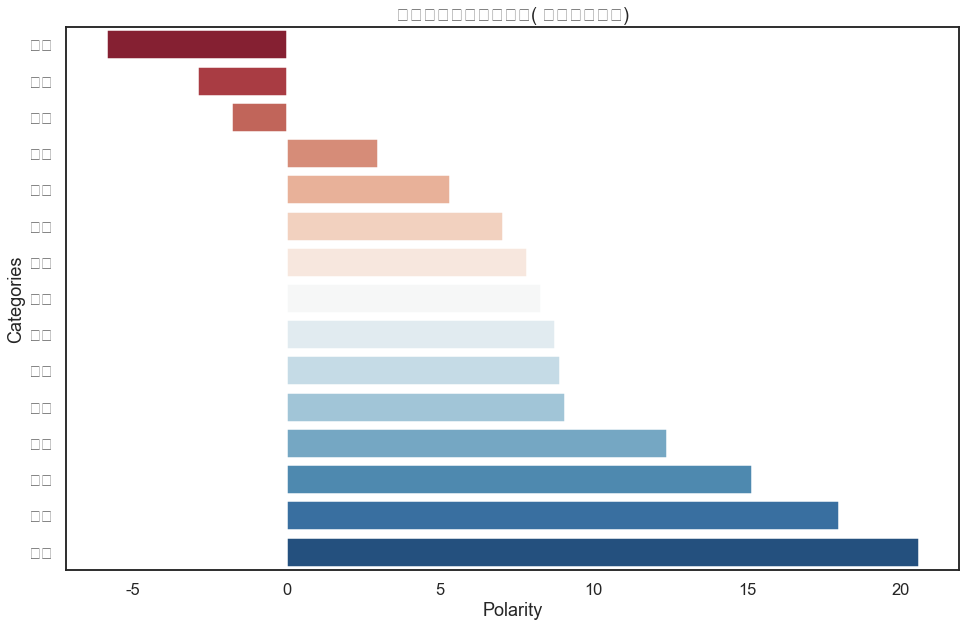

In [20]:
plt.figure(figsize=(16,10)) # 设定画布大小
sns.set(style="white",context="talk") # 设定风格
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',
palette="RdBu") # 水平柱状图
plt.ylabel("Categories") #y 轴标题
plt.xlabel("Polarity") #x 轴标题
plt.title("各类视频受欢迎的程度( 情绪属性分值)") # 图题

**就到这里！**

除NLTK工具包之外，目前，自然语言处理中最流行的工具是深度学习中的循环神经网络以及以BERT为代表的预训练语言模型。这些基于深度学习的模型可以解决越来越多的自然语言处理问题，如人机对话，机器翻译等。